In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### **Load MNIST dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

**Plot image**

In [ ]:
def plot(image,label):
  plt.imshow(tf.squeeze(image))
  print("label : ",label)
  plt.show()

label :  5


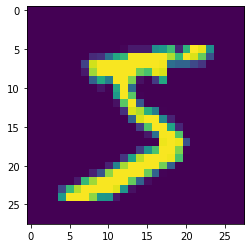

In [ ]:
plot(x_train[0],y_train[0])

#### **Image preprocessing**

In [ ]:
import pandas as pd

def preprocessing(image):
  pixels = pd.Series(image.flatten())
  bw_pixels = pixels.apply(lambda x: 0 if x<128 else 255)
  bw_image = bw_pixels.values.reshape((28,28))
  bw_image = bw_image/255.0
  final_image = tf.expand_dims(bw_image, axis=2)
  return final_image

label :  5


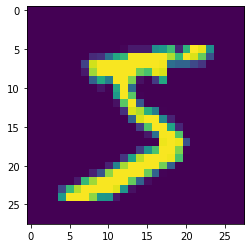

label :  5


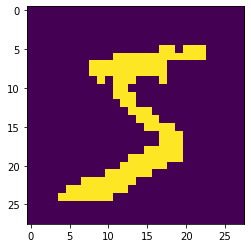

In [ ]:
image,label = x_train[0],y_train[0]
plot(image,label)

processed_image = preprocessing(image)
plot(processed_image,label)

In [ ]:
X_train=[]
X_test=[]
for image in x_train:
  X_train.append(preprocessing(image))

for image in x_test:
  X_test.append(preprocessing(image))

X_train = np.array(X_train)
X_test = np.array(X_test)

### **Keras CNN model**

In [ ]:
def Model():
  model = tf.keras.models.Sequential([
                                    tf.keras.layers.InputLayer(input_shape=(28,28,1),name='image'),
                                    tf.keras.layers.Conv2D(filters=8, kernel_size = 3, input_shape = [28,28,1], activation='relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D(padding='same'),
                                    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D(padding='same'),
                                      tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu',padding='same'),
                                    tf.keras.layers.MaxPooling2D(padding='same'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=64, activation = 'relu'),
                                    tf.keras.layers.Dense(units = 10, activation='softmax')
  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = Model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,callbacks=[callback])

Epoch 1/7
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0988 - accuracy: 0.9692 - val_loss: 0.0567 - val_accuracy: 0.9815
Epoch 2/7
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0461 - val_accuracy: 0.9847
Epoch 3/7
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0483 - val_accuracy: 0.9849
Epoch 4/7
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 5/7
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0392 - val_accuracy: 0.9864
Epoch 6/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0391 - val_accuracy: 0.9878
Epoch 7/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.0300 - val_ac

label :  7


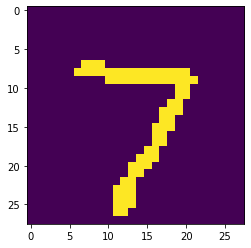

In [ ]:
plot(X_test[0],y_test[0])

In [ ]:
np.argmax(model(np.array([X_test[0]])))

7

In [ ]:
model.predict(X_test)

array([[2.5961153e-10, 5.0094912e-10, 7.1724697e-09, ..., 9.9999976e-01,
        1.7823075e-12, 1.9765825e-08],
       [2.7902860e-07, 9.0840234e-07, 9.9999881e-01, ..., 4.9608437e-09,
        2.4697714e-08, 2.3583496e-08],
       [6.5203956e-08, 9.9996579e-01, 9.8819364e-06, ..., 1.8770173e-05,
        2.0819866e-07, 1.2225790e-07],
       ...,
       [1.2341272e-17, 6.5762125e-11, 1.9738469e-12, ..., 1.2879419e-08,
        3.5249210e-09, 2.5083219e-07],
       [2.3799684e-10, 7.8727302e-10, 7.5401005e-11, ..., 3.5229213e-12,
        3.5027962e-05, 4.3069495e-08],
       [3.2979892e-06, 1.1753208e-10, 6.9951551e-09, ..., 3.3712111e-12,
        9.9979381e-08, 8.8821700e-10]], dtype=float32)

# **Creating adversarial example using FGSM**

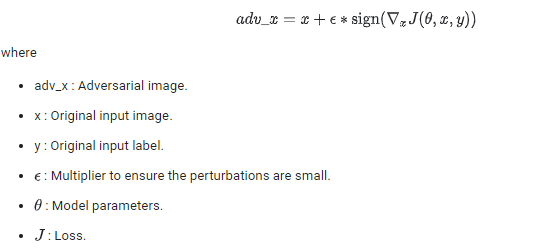

In [ ]:
Loss = tf.keras.losses.CategoricalCrossentropy()

def get_adversarial_pattern(image,label):
  with tf.GradientTape() as tape:
    tape.watch(image)
    y_pred = model(image)
    loss = Loss(label,y_pred)
    gradient = tape.gradient(loss, image)
  signed_grad = tf.sign(gradient)
  return signed_grad

## **Creating and visualizing the perturbations**

#### **Finding the suitable image for adversarial attack**

In [ ]:
y_pred = model(X_test)
# y_pred[np.argmin(y_pred)]

for i in range(len(y_pred)):
  pred = np.argmax(y_pred[i])
  confidence = y_pred[i][np.argmax(y_pred[i])]*100
  if confidence>60 and confidence<62 and pred==y_test[i]:
    print(i)

2185
2293
2532
4508
4860
6093
9587


label :  0


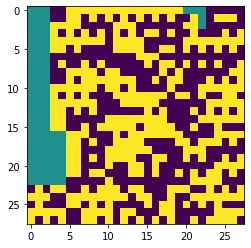

In [ ]:
index = 2185

image = tf.convert_to_tensor(X_test[index])
image = tf.reshape(image,(1,28,28,1))
label = tf.one_hot(y_test[index],10)
label = tf.reshape(label, (1,10))
perturbations = get_adversarial_pattern(image, label)
plot(perturbations[0] * 0.5 + 0.5,y_test[index])

### **Visualizing the difference in confidence on addition of pertubations**

In [ ]:
def display_image(image,label,desc):
  pred = model(image)
  confidence = pred[0][label]
  plt.figure()
  plt.imshow(tf.squeeze(image[0]*0.5+0.5))
  plt.title('{} \n {} : {:.2f}% Confidence'.format(desc,label, confidence*100))
  plt.show()

label :  0


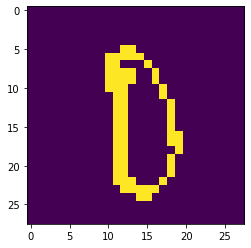

In [ ]:
plot(image,np.argmax(label))

In [ ]:
pred = model(image)
pred[0],np.argmax(pred[0]),pred[0][np.argmax(pred[0])]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([6.1305565e-01, 2.6238987e-03, 7.9627341e-04, 1.1502046e-05,
        3.0325045e-05, 2.6578948e-04, 1.2744160e-02, 9.3206974e-05,
        3.7027755e-01, 1.0168973e-04], dtype=float32)>,
 0,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.61305565>)

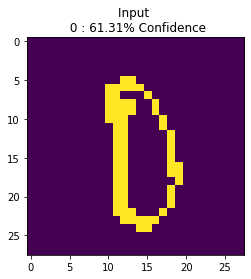

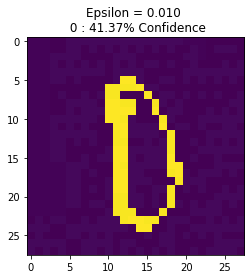

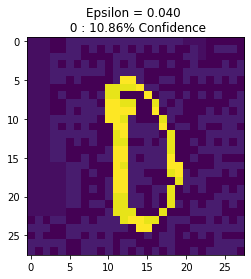

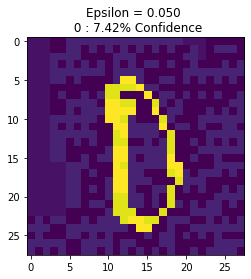

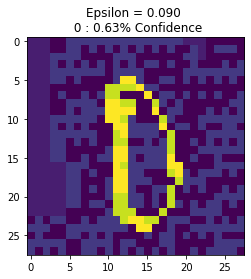

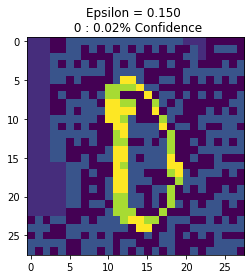

In [ ]:
epsilons = [0, 0.01, 0.04, 0.05,0.09,0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_image(adv_x,y_test[index],descriptions[i])

### **Observation : The confidence of the image classified as 0 decreases and goes as low as 0.02% on addition of pertubation, while the image still remains visually similar to a zero.**